In [415]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # Import train_test_split function

In [416]:
df = pd.read_csv('data.csv')

In [417]:
df

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.80,1514980773,22,-1.24,...,1.00,1.20,1.00,1.66,1.32,1.80,0.63,62,-0.15,0.00
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.00,1493348050,5,7.68,...,1.40,1.12,1.00,1.69,1.69,1.97,1.00,2,7.40,-0.07
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.00,1524516630,10,2.36,...,1.14,1.00,1.00,1.71,1.53,1.86,1.00,8,3.15,-0.04
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.50,1524018289,5,6.00,...,1.00,1.30,1.00,1.73,1.52,1.85,1.00,7,6.61,-0.07
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.80,1516200171,138,4.65,...,1.12,1.14,1.00,1.76,1.44,1.92,0.84,70,4.80,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,24271,ptsd,7vavh4,"(0, 5)",i have horrible vivid nightmares every night. ...,1,1.00,1517790160,7,4.60,...,1.00,1.20,1.00,1.77,1.47,1.84,0.79,15,4.59,-0.07
711,2212,relationships,7oeyuc,"[70, 75]",Also I can't think about both of them without ...,1,0.57,1515192055,0,1.45,...,1.00,1.18,1.00,1.68,1.51,1.84,0.50,7,2.83,0.19
712,27951,relationships,7ssxec,"(35, 40)","Furthermore, I told him before we got really s...",1,0.60,1516848555,3,3.96,...,1.00,1.00,1.00,1.71,1.51,1.86,0.72,10,5.71,-0.04
713,1164,assistance,90bila,"[8, 13]",Here's the link to my amazon wish list where t...,0,0.60,1532048310,18,0.24,...,1.50,1.00,1.00,1.65,1.54,1.91,0.74,2,2.37,0.09


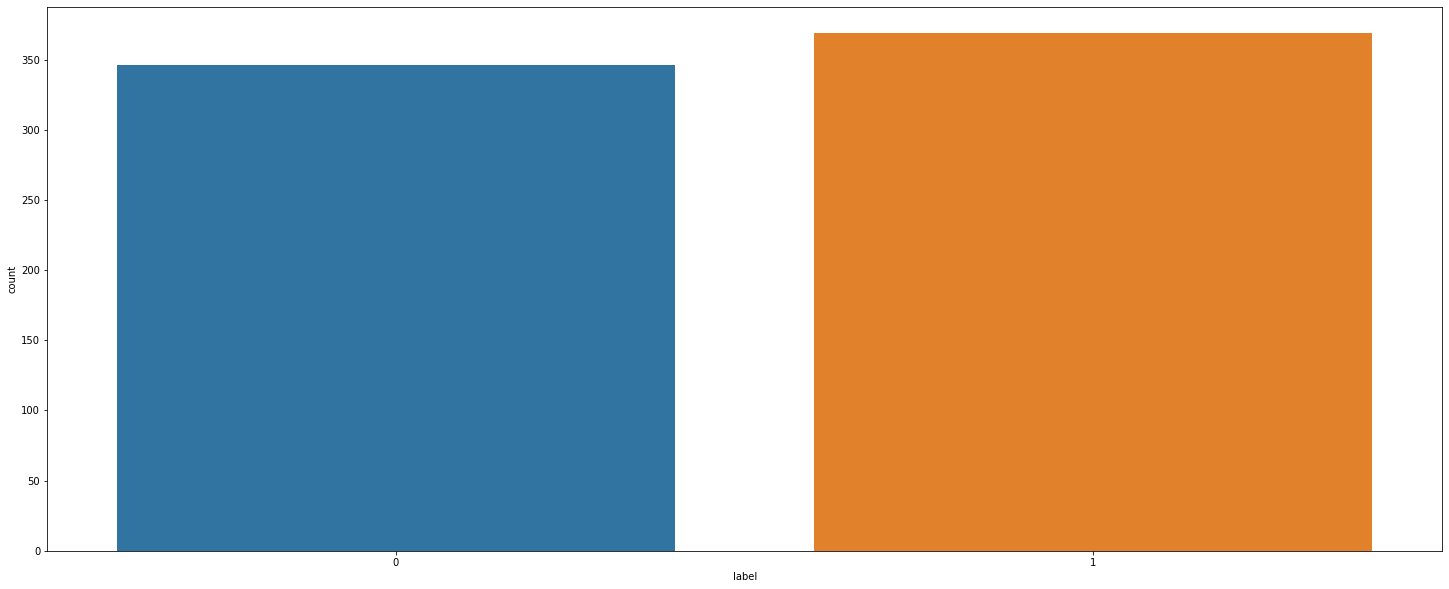

In [418]:
"""show label column distribution in df at bar plot and pie plot
with label and value counts"""

import matplotlib.pyplot as plt
import seaborn as sns

# bar plot
plt.figure(figsize=(25,10))
sns.countplot(x='label', data=df)
plt.show()



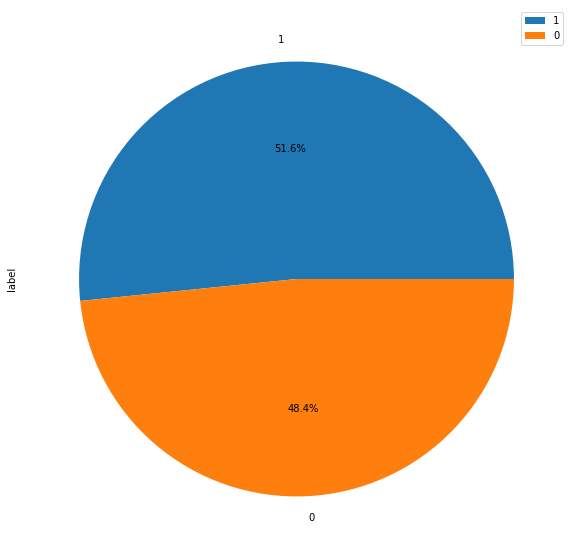

In [419]:
# pie plot with counts value
plt.figure(figsize=(25,10))
df['label'].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend()
plt.show()


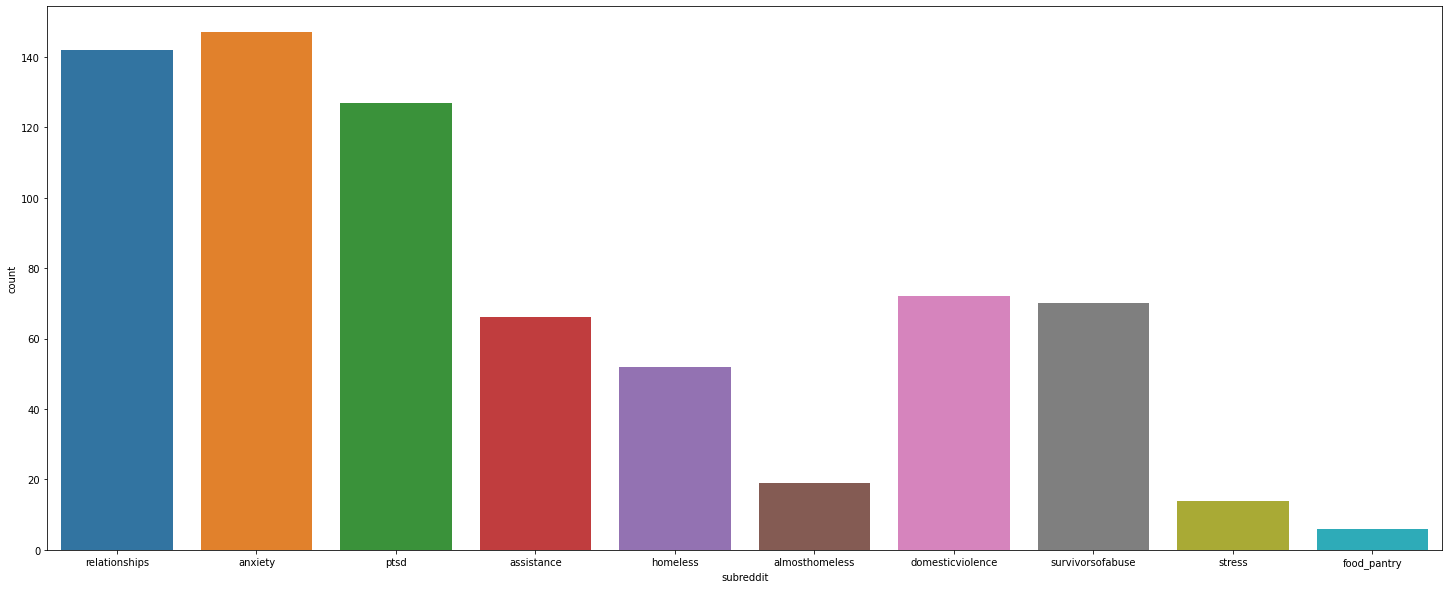

In [420]:
"""plot subreddit column counts at bar plot and pie plot with label and value counts"""

# bar plot
plt.figure(figsize=(25,10))
sns.countplot(x='subreddit', data=df)
plt.show()



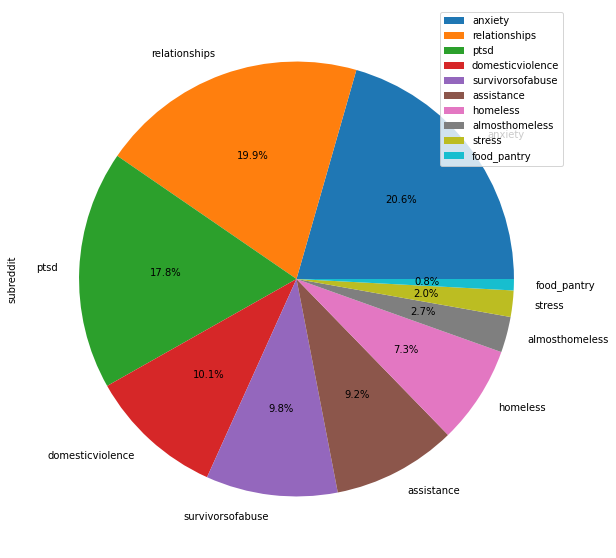

In [421]:
# pie plot subreddit with counts value with labels
plt.figure(figsize=(25,10))
df['subreddit'].value_counts().plot.pie(autopct='%1.1f%%')
"""show labels"""
plt.legend(labels=df['subreddit'].value_counts().index, loc="best")
plt.show()



In [422]:
import nltk # Import the Natural Language Toolkit (NLTK) package
nltk.download("punkt") # Download the punkt tokenizer
nltk.download("stopwords") # Download the stop words list
from nltk.corpus import stopwords  # Import the stop word list
from nltk.tokenize import word_tokenize # Import the word tokenizer

train_df, test_df = train_test_split(df, test_size=0.25, random_state=42) # 70% train, 30% test

stop_words = set(stopwords.words("english")) # Create a set of stop words
def preprocess_1(text): # Define a function for text preprocessing
    # Lowercase and tokenize the text
    tokens = word_tokenize(text.lower()) # Convert the text to lowercase and tokenize it
    
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    # Return the preprocessed text
    return " ".join(tokens)

train_df["text"] = train_df["text"].apply(preprocess_1) # Apply the preprocessing function to the text column
test_df["text"] = test_df["text"].apply(preprocess_1) # Apply the preprocessing function to the text column


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ofk58\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ofk58\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Bu kod, NLTK (Natural Language Toolkit) paketinden metin önişleme için gerekli modüller ve işlevleri içerir, bunlar arasında punkt tokenizer, durak kelime listesi ve kelime tokenizeri vardır. Daha sonra, df adında bir veri çerçevesini iki yeni veri çerçevesine, train_df ve test_df'e ayırır, bu veri çerçevelerinin %70'i eğitim için ve %30'u test için kullanılacaktır.

### Sonra, preprocess_1 adında bir işlev tanımlar, bu işlev bir metin dizesi alır ve ön işlemli metni döndürür. Ön işleme adımları metnin küçük harfe dönüştürülmesini, tokenleştirilmesini ve durak kelimelerinin çıkarılmasını içerir. Son olarak, preprocess_1 işlevi train_df ve test_df veri çerçevelerinin text sütununa uygulanır.

### punkt tokenizer: Bu tokenizer, bir metin içinde kelime ve noktalama işaretlerini ayırt etmek için kullanılır. Örneğin, "Mr. Smith bought a car." cümlesini "Mr.", ".", "Smith", "bought", "a", "car", "." şeklinde tokenler haline getirir.

### stop words list: Bu liste, bir dil içinde sık kullanılan ancak anlamı pek yok olan kelimeleri içerir. Örneğin, İngilizce dilinde stop words listesi "a", "an", "and", "are", "as", "at", "be", "by", "for", "from", "has", "he", "in", "is", "it", "its", "of", "on", "that", "the", "to", "was", "were", "will", "with" gibi kelimeleri içerebilir.

### word tokenizer: Bu tokenizer, bir metin içindeki kelimeleri ayırt etmek için kullanılır. Örneğin, "I went to the store." cümlesini "I", "went", "to", "the", "store", "." şeklinde tokenler haline getirir.

### Bu modüller, metin önişleme işlemlerinde kullanılır. Örneğin, bir metin içindeki kelime ve noktalama işaretleri ayırt edilerek tokenleştirilebilir, daha sonra tokenler arasından dil için sık kullanılan ancak anlamı pek yok olan kelimeler çıkarılabilir. Bu sayede metin içindeki anlamı önemli olan kelimeler daha kolay bulunabilecektir.

In [423]:
train_df["text"] 

388    twice , sent message instagram month ago sayin...
361    'm nursing program , 're talking domestic viol...
519    seems best option babysit weekend see doctor m...
248    gamers , play similar games together often . p...
486    's hard even type , today dropped classes week...
                             ...                        
71     stuck n't means leave hard time accepting abus...
106    'm adult mental illness , went messy breakup u...
270    brothers wedding soon . like soon . fiance rec...
435    moving following workday , went shop collect d...
102    dad utterly distraught , never laid finger us ...
Name: text, Length: 536, dtype: object

### Bu kod bloğu, NLP görevleri için metin verisini ön işleme yapmaktadır. Önce metinleri küçük harfler halinde ve tokenler halinde ayırır, daha sonra stop words'leri kaldırır ve tokenleri lemmatize eder. Sonuç olarak, lemmaların boşluklarla birleştirilmiş bir metin olarak döndürülmesi sağlanır. Bu ön işleme fonksiyonu, train_df ve test_df veri yapılarının "text" sütunlarına uygulanır.

### WordNet lemmatizer, tokenleri lemmatize etmek için konuşma etiketlerini kullanır, bu nedenle basit bir taban form lemmatizer'den daha doğru olur. Her kelimenin dil bilgisi şekillerini ortak bir taban forma, lemma olarak adlandırılan forma dönüştürür. Örneğin, "was" kelimesinin lemma'sı "be", "dogs" kelimesinin lemma'sı "dog" ve "better" kelimesinin lemma'sı "good" dir.

### Lemmatization, kelimeleri aynı taban forma sahip olan benzer kelimeler arasında birleştirerek özellik uzayının boyutunu azaltabilir. Bu, özellikle veri kümesi küçük veya sınırlı bir sözlüğe sahipse, bazı modellerin performansını iyileştirebilir.

In [424]:
nltk.download("wordnet") # Download the wordnet corpus
from nltk.corpus import wordnet # Import the wordnet corpus
from nltk.stem import WordNetLemmatizer # Import the lemmatizer

lemmatizer = WordNetLemmatizer() # Create a lemmatizer object
def preprocess_2(text): 
    # Lowercase and tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize the tokens
    lemmas = [lemmatizer.lemmatize(token) for token in tokens] 
    
    # Return the preprocessed text
    return " ".join(lemmas)

train_df["text"] = train_df["text"].apply(preprocess_2) # Apply the preprocessing function to the text column
test_df["text"] = test_df["text"].apply(preprocess_2) # Apply the preprocessing function to the text column

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ofk58\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [425]:
train_df["text"]

388    twice , sent message instagram month ago sayin...
361    'm nursing program , 're talking domestic viol...
519    seems best option babysit weekend see doctor m...
248    gamers , play similar game together often . pa...
486    's hard even type , today dropped class week s...
                             ...                        
71     stuck n't mean leave hard time accepting abuse...
106    'm adult mental illness , went messy breakup u...
270    brother wedding soon . like soon . fiance rece...
435    moving following workday , went shop collect d...
102    dad utterly distraught , never laid finger u ....
Name: text, Length: 536, dtype: object

### Bu kod bloğu, NLP görevleri için metin verisini ön işleme yapmaktadır. Önce metinleri küçük harfler halinde ve tokenler halinde ayırır, daha sonra stop words'leri kaldırır ve tokenleri çekirdeklerine dönüştürür. Sonuç olarak, çekirdeklerin boşluklarla birleştirilmiş bir metin olarak döndürülmesi sağlanır. Bu ön işleme fonksiyonu, train_df ve test_df veri yapılarının "text" sütunlarına uygulanır.

### Porter Stemmer, bir kelimenin çekirdeğini elde etmek için yaygın ekleri kaldıran basit bir heuristik algoritmadır. Örneğin, "jumping" kelimesinin çekirdeği "jump", "jumps" kelimesinin çekirdeği "jump" ve "jumped" kelimesinin çekirdeği "jump" dir. Ancak, çekirdekleyici her zaman geçerli bir İngilizce kelimeyi çekirdek olarak üretmez ve bazen çekirdekler üretebilir ki bunlar orijinal kelimeyle çok benzer değillerdir.

### Stemmer, aynı çekirdeğe sahip benzer kelimeleri birleştirerek özellik uzayının boyutunu azaltmaya yardımcı olabilir. Ancak, lemmatization'dan daha az doğru olmasının nedeni her kelimenin konuşma etiketlerine göre düşünmemesidir. Ayrıca, yaygın eklerle ilgili olmayan inflection ve türetimleri işleme konusunda da daha az etkilidir.

In [426]:
nltk.download("porter_test") # Download the Porter stemmer
from nltk.stem import PorterStemmer # Import the Porter stemmer

stemmer = PorterStemmer() # Create a stemmer object
def preprocess_3(text): # Define a function for text preprocessing
    # Lowercase and tokenize the text
    tokens = word_tokenize(text.lower()) # Convert the text to lowercase and tokenize it
    
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words] # Remove stop words
    
    # Stem the tokens
    stems = [stemmer.stem(token) for token in tokens] # Stem the tokens
    
    # Return the preprocessed text
    return " ".join(stems)

train_df["text"] = train_df["text"].apply(preprocess_3) # Apply the preprocessing function to the text column
test_df["text"] = test_df["text"].apply(preprocess_3) # Apply the preprocessing function to the text column

[nltk_data] Downloading package porter_test to
[nltk_data]     C:\Users\ofk58\AppData\Roaming\nltk_data...
[nltk_data]   Package porter_test is already up-to-date!


In [427]:
train_df["text"]

388    twice , sent messag instagram month ago say ``...
361    'm nurs program , 're talk domest violenc . ha...
519    seem best option babysit weekend see doctor mo...
248    gamer , play similar game togeth often . part ...
486    's hard even type , today drop class week scho...
                             ...                        
71     stuck n't mean leav hard time accept abus . tr...
106    'm adult mental ill , went messi breakup unhea...
270    brother wed soon . like soon . fianc recent lo...
435    move follow workday , went shop collect dish s...
102    dad utterli distraught , never laid finger u ....
Name: text, Length: 536, dtype: object

#### Bu kod bloğu scikit-learn kütüphanesinden TfidfVectorizer sınıfını da içe aktarır, bu sınıf metin verisini sayısal özellik vektörlerine dönüştürmek için kullanılır.

### TfidfVectorizer, terim frekansı-ters doküman frekansı (TF-IDF) yaklaşımını kullanarak metin verisini sayısal özellik vektörlerine dönüştürür. Bu yaklaşım, her dokümanı (ör. metin örneği) korpusdaki terimlerin doküman frekansları ters orantılı ve terim frekansları orantılı olarak ağırlıklı terimler vektörü olarak temsil eder. Sonuç olarak elde edilen özellik vektörleri, daha sonra makine öğrenimi modellerine girdi olarak kullanılabilir.

In [428]:
# Train and evaluate a logistic regression classifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer # Import the vectorizer

y_train = train_df["label"] # Create a series with the labels
y_test = test_df["label"] # Create a series with the labels

vectorizer = TfidfVectorizer() # Create a vectorizer object
X_train = vectorizer.fit_transform(train_df["text"]) # Transform the text column
X_test = vectorizer.transform(test_df["text"])  # Transform the text column

In [429]:
print(X_train.shape)
print(X_train)

(536, 3600)
  (0, 2309)	0.10064438524465823
  (0, 1470)	0.15452034710413343
  (0, 1809)	0.1826968012984166
  (0, 1705)	0.21218708774009187
  (0, 3549)	0.09189235613010092
  (0, 1869)	0.1637792279654352
  (0, 1604)	0.15194421892259896
  (0, 3570)	0.13650943712827437
  (0, 2315)	0.1991374281023069
  (0, 3466)	0.08150408146740805
  (0, 2945)	0.10166619870940022
  (0, 3216)	0.10923964629111353
  (0, 952)	0.18987854724100514
  (0, 2073)	0.17682888760322016
  (0, 1143)	0.08896448214417929
  (0, 351)	0.1991374281023069
  (0, 2513)	0.1573207578709873
  (0, 3239)	0.1482022717721507
  (0, 2818)	0.2671631262847055
  (0, 3301)	0.09076296232870983
  (0, 1344)	0.1964467260109621
  (0, 2631)	0.1991374281023069
  (0, 3184)	0.1637792279654352
  (0, 3332)	0.11742202476925086
  (0, 338)	0.18987854724100514
  :	:
  (535, 3105)	0.20570141453761817
  (535, 2235)	0.41140282907523634
  (535, 3406)	0.20570141453761817
  (535, 1260)	0.18407475296359804
  (535, 2091)	0.19305062850102922
  (535, 972)	0.1930506285

### LogisticRegression

In [430]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define the grid of hyperparameters to search
param_grid = { # Define the grid of hyperparameters to search
    "C": [0.1, 1.0, 10.0], # Regularization parameter
    "penalty": ["l2"], # Norm used in the penalization
    "solver": ["liblinear", "lbfgs"], # Algorithm to use in the optimization problem
}

# Create the logistic regression model
logistic = LogisticRegression()

# Create the grid search object
grid_search = GridSearchCV(logistic, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

# Evaluate the model on the test set
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred)) # Print the classification report

{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.69      0.74      0.72        78
           1       0.79      0.74      0.77       101

    accuracy                           0.74       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.75      0.74      0.74       179



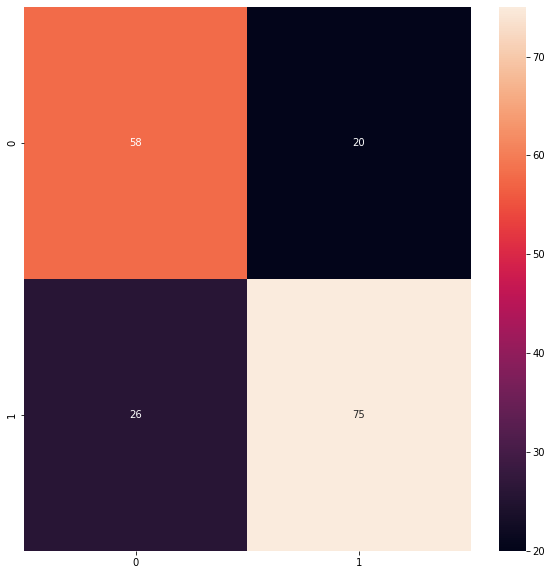

In [431]:

# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

# plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

In [432]:
#acuracy
from sklearn.metrics import accuracy_score
print('Accuracy : ', format(accuracy_score(y_test, y_pred), '.2f'))
lr_accuracy = accuracy_score(y_test, y_pred)

# sensitivity
sensitivity = 0.0
sensitivity = confusion_matrix(y_test, y_pred)[0,0]/(confusion_matrix(y_test, y_pred)[0,0]+confusion_matrix(y_test, y_pred)[0,1])
lr_sensitivity = sensitivity
print('Sensitivity : ', format(sensitivity, '.2f'))

# specificity
specificity = 0.0
specificity = confusion_matrix(y_test, y_pred)[1,1]/(confusion_matrix(y_test, y_pred)[1,0]+confusion_matrix(y_test, y_pred)[1,1])
lr_specificity = specificity
print('Specificity : ', format(specificity, '.2f'))

## f1 score
from sklearn.metrics import f1_score
print('F1 score : ', format(f1_score(y_test, y_pred), '.2f'))
lr_f1 = f1_score(y_test, y_pred)

## precision score
from sklearn.metrics import precision_score
print('Precision score : ', format(precision_score(y_test, y_pred), '.2f'))
lr_precision = precision_score(y_test, y_pred)

Accuracy :  0.74
Sensitivity :  0.74
Specificity :  0.74
F1 score :  0.77
Precision score :  0.79


In [433]:
df_pred = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred}) # Create a dataframe with the test and predicted labels
df_pred['equal'] = df_pred['y_test'] == df_pred['y_pred'] # Create a column with the comparison between the test and predicted labels
df_pred

,y_test,y_pred,equal
120,0,0,True
570,1,0,False
39,0,0,True
294,1,1,True
666,1,1,True
...,...,...,...
559,1,0,False
260,0,0,True
544,1,1,True
687,0,0,True


In [434]:
df_pred[df_pred['equal'] == False] # show differences in dataframe table y_pred and y_test and if they are equal or not

,y_test,y_pred,equal
570,1,0,False
437,1,0,False
97,1,0,False
456,0,1,False
239,1,0,False
265,1,0,False
588,0,1,False
131,1,0,False
72,1,0,False
118,1,0,False


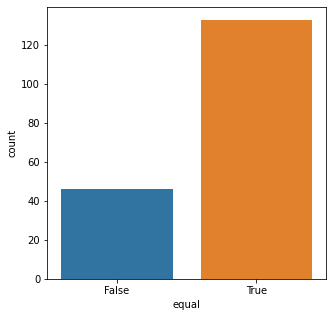

In [435]:

plt.figure(figsize=(5,5))
sns.countplot(x='equal', data=df_pred) # show countplot equal
plt.show()


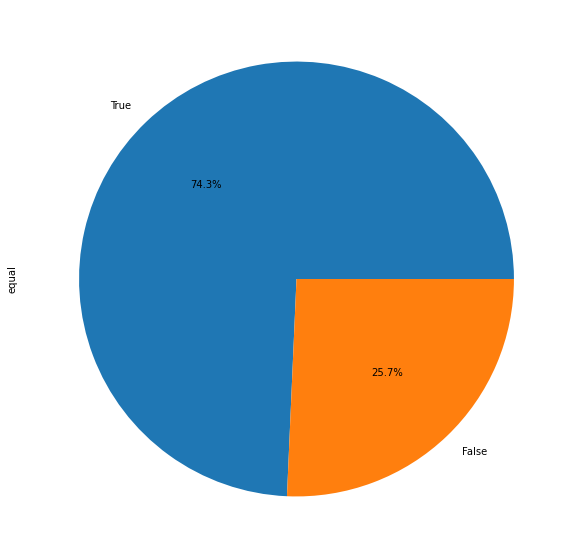

In [436]:
plt.figure(figsize=(10,10))
df_pred['equal'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [437]:
print(df_pred['equal'].value_counts()) # show count equal True and False

True     133
False     46
Name: equal, dtype: int64


In [438]:
print(df_pred['equal'].value_counts(normalize=True)) # show count equal True and False in percentage

True    0.74
False   0.26
Name: equal, dtype: float64


## svm model

In [439]:
### svm model ###
from sklearn.svm import SVC

param_grid = {
    "C": [0.1, 1.0, 10.0], # Regularization parameter
    "kernel": ["linear", "rbf"], # Kernel type to be used in the algorithm
    "gamma": ["scale", "auto"], # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’
}

# Create the support vector classifier
svc = SVC()

# Create the grid search object
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)
# Evaluate the model on the test set
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))



Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.67      0.74      0.71        78
           1       0.78      0.72      0.75       101

    accuracy                           0.73       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.73      0.73       179



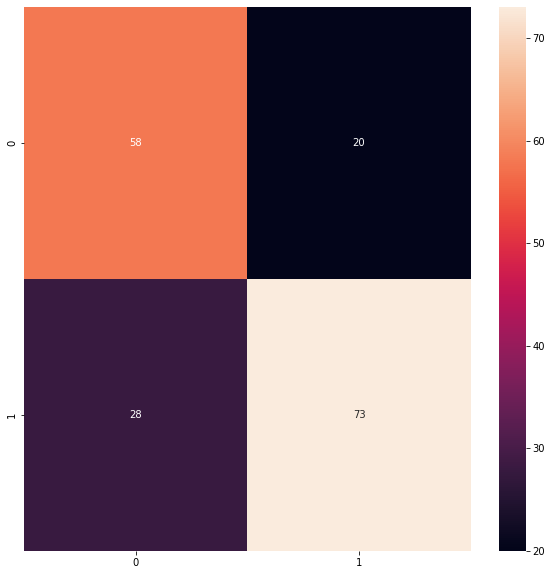

In [440]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

# plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

In [441]:
#acuracy
from sklearn.metrics import accuracy_score
print('Accuracy : ', format(accuracy_score(y_test, y_pred), '.2f'))
svm_accuracy = accuracy_score(y_test, y_pred)

# sensitivity
sensitivity = 0.0
sensitivity = confusion_matrix(y_test, y_pred)[0,0]/(confusion_matrix(y_test, y_pred)[0,0]+confusion_matrix(y_test, y_pred)[0,1])
svm_sensitivity = sensitivity

print('Sensitivity : ', format(sensitivity, '.2f'))

# specificity
specificity = 0.0
specificity = confusion_matrix(y_test, y_pred)[1,1]/(confusion_matrix(y_test, y_pred)[1,0]+confusion_matrix(y_test, y_pred)[1,1])
svm_specificity = specificity
print('Specificity : ', format(specificity, '.2f'))

## f1 score
from sklearn.metrics import f1_score
print('F1 score : ', format(f1_score(y_test, y_pred), '.2f'))
svm_f1 = f1_score(y_test, y_pred)

## precision score
from sklearn.metrics import precision_score
print('Precision score : ', format(precision_score(y_test, y_pred), '.2f'))
svm_precision = precision_score(y_test, y_pred)

Accuracy :  0.73
Sensitivity :  0.74
Specificity :  0.72
F1 score :  0.75
Precision score :  0.78


### random forest

In [442]:
### random forest model ###
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators": [100, 200], # Number of trees in the forest
    "criterion": ["entropy"], # Function to measure the quality of a split
    "max_depth": [None, 5], # Maximum number of levels in each decision tree
    "min_samples_split": [2, 5, 10], # Minimum number of samples required to split an internal node
    "min_samples_leaf": [1, 2, 4], # Minimum number of samples required to be at a leaf node
}

# Create the random forest classifier
rf = RandomForestClassifier()

# Create the grid search object
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)
# Evaluate the model on the test set
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.66      0.72      0.69        78
           1       0.77      0.71      0.74       101

    accuracy                           0.72       179
   macro avg       0.71      0.72      0.71       179
weighted avg       0.72      0.72      0.72       179



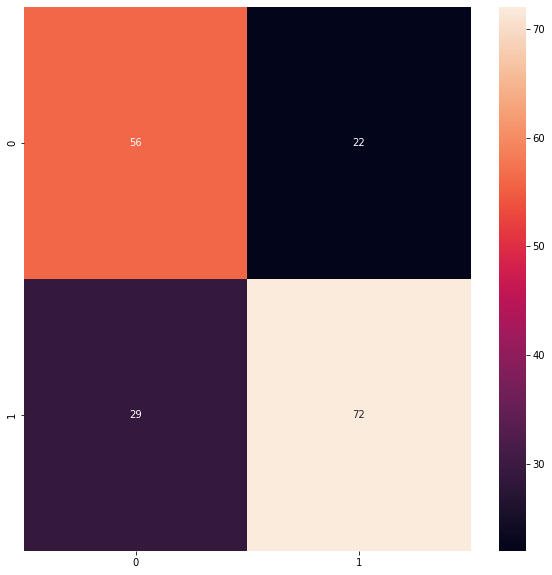

In [443]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

# plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

In [444]:
#acuracy
from sklearn.metrics import accuracy_score
print('Accuracy : ', format(accuracy_score(y_test, y_pred), '.2f'))
rf_accuracy = accuracy_score(y_test, y_pred)

# sensitivity
sensitivity = 0.0
sensitivity = confusion_matrix(y_test, y_pred)[0,0]/(confusion_matrix(y_test, y_pred)[0,0]+confusion_matrix(y_test, y_pred)[0,1])
rf_sensitivity = sensitivity
print('Sensitivity : ', format(sensitivity, '.2f'))
# specificity
specificity = 0.0
specificity = confusion_matrix(y_test, y_pred)[1,1]/(confusion_matrix(y_test, y_pred)[1,0]+confusion_matrix(y_test, y_pred)[1,1])
rf_specificity = specificity
print('Specificity : ', format(specificity, '.2f'))

## f1 score
from sklearn.metrics import f1_score
print('F1 score : ', format(f1_score(y_test, y_pred), '.2f'))
rf_f1 = f1_score(y_test, y_pred)

## precision score
from sklearn.metrics import precision_score
print('Precision score : ', format(precision_score(y_test, y_pred), '.2f'))
rf_precision = precision_score(y_test, y_pred)



Accuracy :  0.72
Sensitivity :  0.72
Specificity :  0.71
F1 score :  0.74
Precision score :  0.77


In [445]:
# all model accuracy, sensitivity, specificity, f1 score, precision score in one dataframe
df = pd.DataFrame({'Model': ['Logistic Regression', 'SVM', 'Random Forest'],
                     'Accuracy': [lr_accuracy, svm_accuracy, rf_accuracy],
                        'Sensitivity': [lr_sensitivity, svm_sensitivity, rf_sensitivity],
                        'Specificity': [lr_specificity, svm_specificity, rf_specificity],
                        'F1 score': [lr_f1, svm_f1, rf_f1],
                        'Precision score': [lr_precision, svm_precision, rf_precision]})
pd.options.display.float_format = '{:,.2f}'.format
df

,Model,Accuracy,Sensitivity,Specificity,F1 score,Precision score
0,Logistic Regression,0.74,0.74,0.74,0.77,0.79
1,SVM,0.73,0.74,0.72,0.75,0.78
2,Random Forest,0.72,0.72,0.71,0.74,0.77


### predict

In [446]:
### svc model predict a text ###
def check_text(text):
    text = preprocess_1(text)
    text = preprocess_2(text)
    text = preprocess_3(text)
    text = vectorizer.transform([text])
    y_pred = grid_search.predict(text)
    print(y_pred)

In [447]:
text = "I stressed out because of my work." # Text to check
check_text(text)

[0]


In [448]:
text = "I loved this movie" # Text to check
check_text(text)


[0]


In [449]:
text = "I hated this movie" # Text to check
check_text(text) 

[0]


In [450]:
text = "everything was great" # Text to check
check_text(text)


[0]


In [451]:
text = "I'm super stressed about this" # Text to check
check_text(text)

[0]


In [452]:
text = "I can't look at life positively because of some events in my life" # Text to check
check_text(text)

[0]
